In [9]:
import  os
import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
os.chdir(r'C:\Users\arita\Desktop\test')
df = pd.read_csv("wikihowAll.csv", usecols = ['text'])
df = df.astype('str')
df

,text
0,"If you're a photographer, keep all the necess..."
1,See the image for how this drawing develops s...
2,It is possible to become a VFX artist without...
3,The best art investors do their research on t...
4,"As you start planning for a project or work, ..."
...,...
215360,"If you have a name that you like, you might f..."
215361,Your name might sound great to you when you s...
215362,Relief printing is the oldest and most tradit...
215363,"Intaglio is Italian for ""incis­ing,"" and corr..."


The logic is pretty simple, we just have to embed the search word and compare against the embedding of all the sentences. For comparing or checking the similarity we use a metric called Cosine Similarity.

Cosine similarity
Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction.
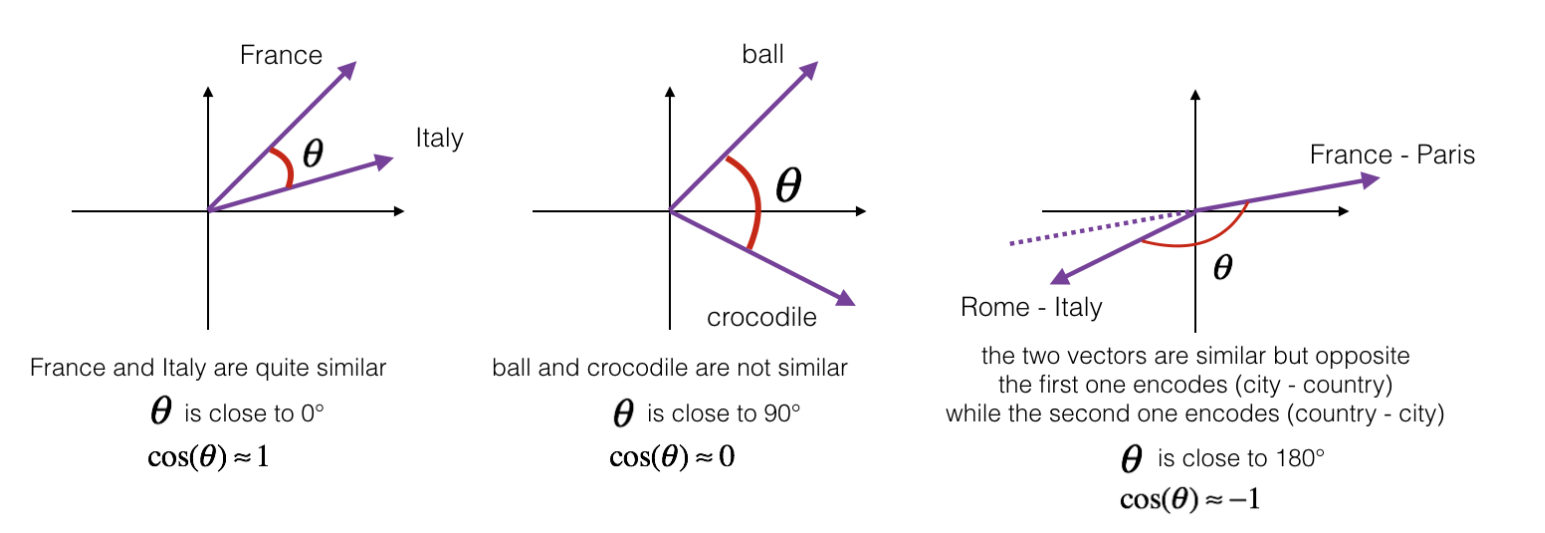

In [6]:
def find_similar(vector_representation, all_representations, k=1):
    similarity_matrix = cosine_similarity(vector_representation, all_representations)
    #np.fill_diagonal(similarity_matrix, 0)
    similarities = similarity_matrix[0]
    if k == 1:
        return [np.argmax(similarities)]
    elif k is not None:
        return np.flip(similarities.argsort()[-k:][::1])

In [ ]:
paragraph = df.iloc[:, 0]
embeddings_distilbert = model.encode(paragraph.values)

In [5]:
embeddings_distilbert[0]

array([ 2.17092168e-02,  2.39430927e-02,  7.12087974e-02,  1.65454764e-02,
        8.68902504e-02,  2.88454853e-02,  4.94294381e-03, -2.40750555e-02,
       -2.42368635e-02,  2.02358980e-02, -4.06538993e-02,  2.68979706e-02,
        2.40425896e-02,  6.24207780e-02,  6.42050942e-03,  1.39733236e-02,
       -1.48681528e-03, -5.54145221e-03, -2.54597999e-02, -1.76822320e-02,
       -4.17240821e-02, -5.23799248e-02,  1.50242513e-02, -4.58245724e-03,
        1.01778172e-02,  7.98211321e-02,  1.36857396e-02, -5.90858273e-02,
        3.65960076e-02, -4.42386381e-02,  6.55684471e-02,  2.98280921e-02,
        3.27022113e-02, -6.60884660e-03,  7.05369338e-02,  6.72469437e-02,
       -2.54063327e-02,  3.51943783e-02,  8.96652043e-02,  2.45299991e-02,
       -1.62433740e-02,  6.71856478e-02, -9.02292877e-02,  5.95934205e-02,
        5.38948961e-02, -5.58519661e-02,  1.51660922e-03, -5.87862059e-02,
        8.81481543e-02, -4.66352813e-02,  8.98029357e-02, -3.06510925e-02,
       -3.73168550e-02, -

In [6]:
embeddings_distilbert[0].shape

(384,)

In [18]:
search_string = "python code"
search_vect = model.encode([search_string])

In [19]:
K = 40
distilbert_similar_indexes = find_similar(search_vect, embeddings_distilbert, K)

In [20]:
distilbert_similar_indexes

array([ 99369,  99352,  99370,  99119, 100438,  99375,  99373, 125054,
        99102,  99068,  99302,  50494,  97778,  99356,  99067,  55620,
       125062,  99126,  99376, 100439,  40825,  99349, 101971,  99368,
        99104, 182645,  99683,  82445,  99023,  97765,  47087, 101150,
        99143, 147496,  99334,  56578,  99367, 102075,  99164,  99063],
      dtype=int64)

In [21]:
output_data = []
for index in distilbert_similar_indexes:
    output_data.append(paragraph[index])

In [22]:
output_data[:50]

[' This may be IDLE, or Stani\'s Python Editor (SPE). Make sure all subprograms are off if using IDLE.;\n, This is the structure for a for loop:\n\n\nfor i in range (0, 10):\nprint "Hello World"\n\n, A method for both is shown.\n\n\nwhile True:\nprint "Hello World"\n\n, (True will always be True).\n\n\nwhile answer == "Yes" and grade == "6":\nAs long as the variables answer and grade are Yes and 6,\n\n,',
 ' I recommend the interactive prompt while you\'re practicing it. To open IDLE, go to the Start Menu > Python (version number, mine is 2.6) > IDLE (Python GUI).\n\n, To do this, we write a variable name, like foo, followed by an equal sign for assignment, a left bracket, then a series of values separated by commas, and finally a right bracket. Example: foo = . This is called a list.\n\n, Write foo2 = . This runs a for loop which goes through each item in another list, string, dictionary, tuple, or other data type. The item before the for loop puts that item inside our new list. Press